In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import sys
sys.path.append("../src")
from dataset_torchio import make_loaders, BRATSDataset

/Users/arushreemishra/brats3d_venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
preproc_folder = "../data/processed/brats128"   # same as preprocessing output
batch_size = 1

train_loader, val_loader = make_loaders(preproc_folder, batch_size=batch_size,
                                       num_workers=2, shuffle_train=True, augment=True)

In [3]:
# run one batch from train
for batch in train_loader:
    images, masks = batch   # images: [B, C, X, Y, Z], masks: [B, X, Y, Z]
    print("images.shape:", images.shape)
    print("masks.shape:", masks.shape)
    break

/Users/arushreemishra/brats3d_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


images.shape: torch.Size([1, 4, 128, 128, 128])
masks.shape: torch.Size([1, 128, 128, 128])


In [4]:
# move to cpu numpy for visualization (batch=1)
img = images[0].cpu().numpy()   # [4, X, Y, Z]
msk = masks[0].cpu().numpy()    # [X, Y, Z]

In [5]:
# choose a random slice along Z axis
Z = img.shape[-1]
slice_idx = Z // 2

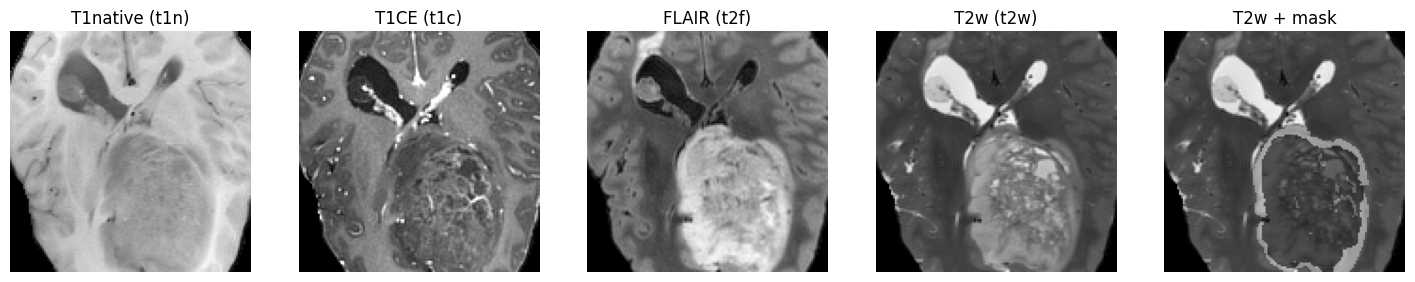

In [8]:
fig, axs = plt.subplots(1,5, figsize=(18,4))
modal_names = ["T1native (t1n)", "T1CE (t1c)", "FLAIR (t2f)", "T2w (t2w)"]
for i in range(4):
    axs[i].imshow(img[i,:,:,slice_idx].T, cmap='gray', origin='lower')  # transpose if needed
    axs[i].set_title(modal_names[i])
    axs[i].axis('off')
    # overlay mask as an alpha layer on the last subplot
axs[4].imshow(img[3,:,:,slice_idx].T, cmap='gray', origin='lower')
axs[4].imshow(np.ma.masked_where(msk[:,:,slice_idx].T==0, msk[:,:,slice_idx].T), alpha=0.5, cmap='nipy_spectral', origin='lower')
axs[4].set_title("T2w + mask")
axs[4].axis('off')

plt.show()